# Coursework for Artificial Intelligence H COMPSCI4004 2024-2025

## Imports

In [1]:
import os, sys
import networkx as nx
# from mazelib import Maze
# from mazelib.generate.Prims import Prims
# import numpy as np
# import random as rand

import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")

print("Python version:", sys.version)
print("Networkx version:", nx.__version__)
print("IPyWidgets version:", widgets.__version__)

Python version: 3.13.0 | packaged by Anaconda, Inc. | (main, Oct  7 2024, 21:29:38) [GCC 11.2.0]
Networkx version: 3.4.2
IPyWidgets version: 8.1.5


In [2]:
import maze as m
import solvers as solv
from notebookutils import display_visual

%load_ext autoreload
%autoreload 2

In [3]:
# # To import the AIMA toolbox, add path the to the AIMA Python Toolbox folder on your system
# AIMA_TOOLBOX_ROOT="/home/valeria/Documents/Code/aima-python-uofg_v20202021a"
# sys.path.append(AIMA_TOOLBOX_ROOT)

# import search as sch
# from notebookutils import show_map, display_visual

## Parameters

In [ ]:
N = [11, 15, 21, 25, 31] # Growing number of tiles on the side
M = 2 # Fixed number of wormholes

n_repetitions = 10

## Setup

In [16]:
results_dir = os.path.join("solved", "N01")
if not os.path.isdir(results_dir): os.mkdir(results_dir)

filepath = lambda N, label, extension, k : os.path.join(results_dir, f"{label}_{N:02.0f}_{k:02.0f}.{extension}")

In [17]:
filepath(11, "maze", "png", 0)

'solved/N01/maze_11_00.png'

## Problem Description

Important personal interpretation
- I am assuming that going down a teleportation link is optional: e.g. in (2,1) it's possible to go right, go left, or go down the teleportation link.
- I am assuming that the wormholes are one-ways passages: e.g. from (2,1) you can go down the teleportation link to (0,7), but from (0,7) you can't go to (2,1).

Problem details
- Environment? Besides being discrete and static, it is...
    - Deterministic, because wormholes might lead to an unknown state, but they always lead to the same state with 100% probability.
    - Partially observable, because it is not known from the percepts where the "teleport" action is going to take the agent.
- Actuators? Move the agent according to 5 possible actions:
    - Left
    - Right
    - Up
    - Down
    - Teleport
- Percepts? 
    - Current x,y location
    - Feasibility of all 5 actions, expressed by booleans (l,r,u,d,t)
- Sensors? Incomplete because...
    - The agent knows to which state the (Left, Right, Up, Down) actions take it
    - But the agent does not know to which state the (Teleport) action takes it
- Performance measure? The sortest the path to goal, the better (in terms of steps taken from the start point)

Important properties
- Branching factor? $b=5$, due to the 5 possible actions; could be optimistically lowered to 3 for most cases, since most tiles are only connected to 2 neighbours.
- Depth of the solution? $d\leq 4(N-2)$ with no teleportation links, effectively less with teleportation links

## Solver description

The **heuristic function** $h$ is an arbitrary, non-negative, problem-specific function with one constrain: if $n$ is a goal node, then $h(n)=0$.

_The tree-search version of A-star is optimal if the heuristic function is **admissible**_. 

A heuristic function is admissible if it never overestimates the cost to reach a goal, i.e. an admissible h is optimistic, returning the estimated cost of the cheapest/shortest path from a state to the goal.

An agent at the start of a teleportation link can choose to go down the wormhole. However, it cannot know in advance where the exit is. _The most optimistic agent going down a wormhole will always assume that a wormhole can take you right to the exit._

_The graph-search version of A-star is optimal if the heuristic function is **consistent**_. 

A heuristic function is consistent if, for every node $n$ and every successor $n'$ of $n$ generated by any action $a$, the estimated cost of reaching the goal from $n$ is no greater than the step cost of getting to $n'$ plus the estimated cost of reaching the goal from $n'$:

$h(n) \leq c(n,a,n') + h(n')$

This is a form of the general triangle inequality. 

"For an admissible heuristic, the inequality makes perfect sense: if there were a route from $n$ to $G_n$ via $n'$ that was cheaper than $h(n)$, that would violate the property that $h()n)$is a lower bound on the cost to reach $G_n$" (Russel, S, & Norvig, P.: _Artificial Intelligence: A Modern Approach_, 3rd edition, Pearson Education, 2010, USA)

If $h$ is consistent, then the values of $f(n)$ along any path are nondecreasing.

_Unfortunetely, my heuristic function is **not consistent nor admissible**_

_The reason why I still chose A-star is because it strikes a good complexity balance, most probably reaching a good solution with less iterations that uniformed search methods such as DFS and BFS.

## Experiment

In [ ]:
n = N[0]

branching_factors = []

maze_problem = m.wormholes_maze_problem(n, M, show_plots=True)
plt.savefig(filepath(n, "maze", "png",0))
plt.close()

branching_factor = max([len(v) for (k,v) in maze_problem.graph.graph_dict.items()])
branching_factors.append(branching_factor)

In [21]:
iterations, all_node_colors, node, solution_path = solv.wormholes_maze_A_star_solver(maze_problem, verbose=False)

print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Solution trace:[<Node S_10_03>, <Node S_09_03>, <Node S_09_04>, <Node S_09_05>, <Node S_09_06>, <Node S_09_07>, <Node S_09_08>, <Node S_09_09>, <Node S_08_09>, <Node S_07_09>, <Node S_06_09>, <Node S_05_09>, <Node S_04_09>, <Node S_03_09>, <Node S_03_08>, <Node S_03_07>, <Node S_02_07>, <Node S_01_07>, <Node S_01_06>, <Node S_01_05>, <Node S_00_05>]
----------------------------------------


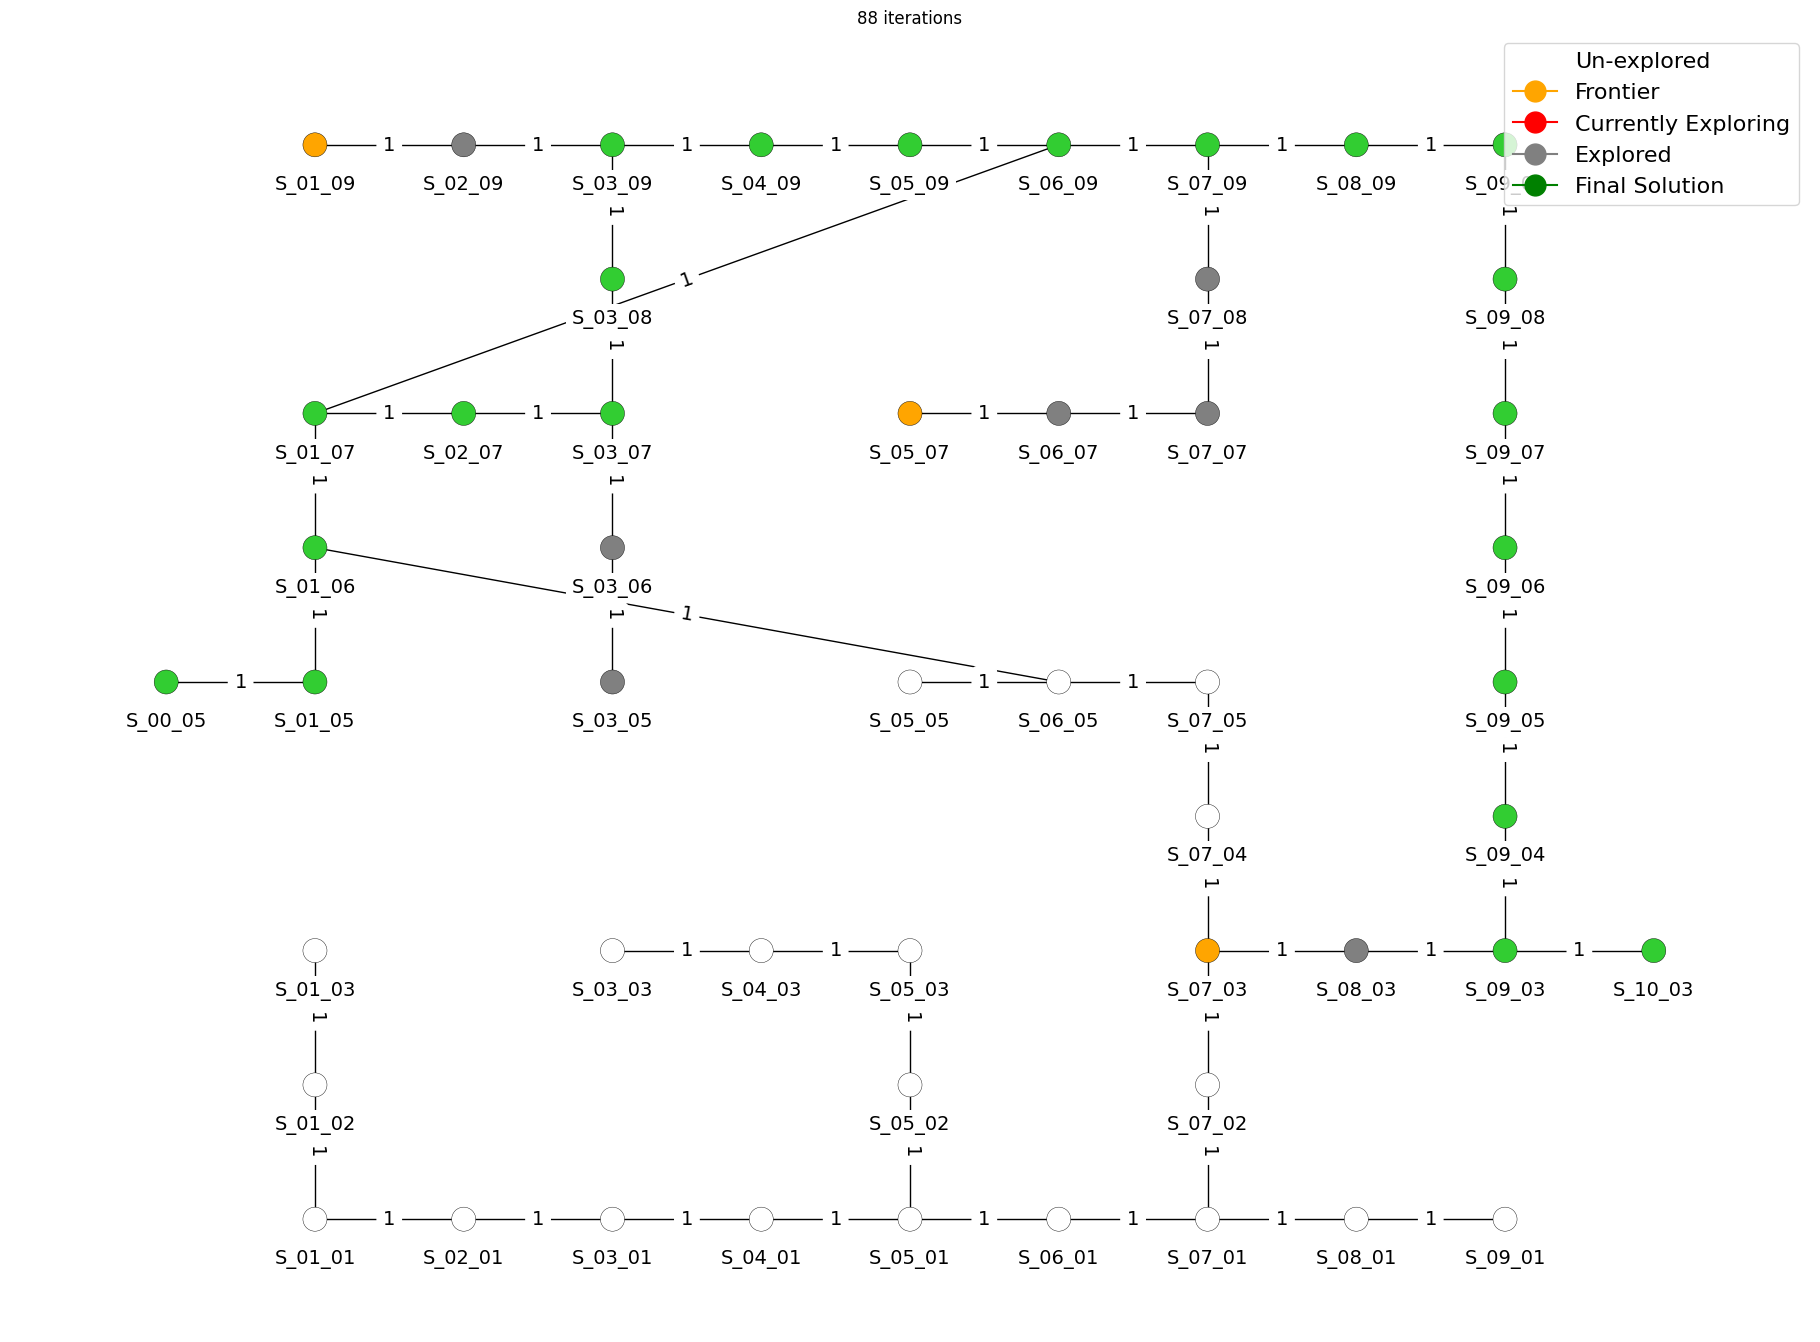

In [22]:
m.show_wormholes_maze_problem(maze_problem, all_node_colors[-1], iterations)

### Analysis

**I'm now updating my h after exploring the wormhole**

Ouch! Never got to explore the upper path and find the shortcut

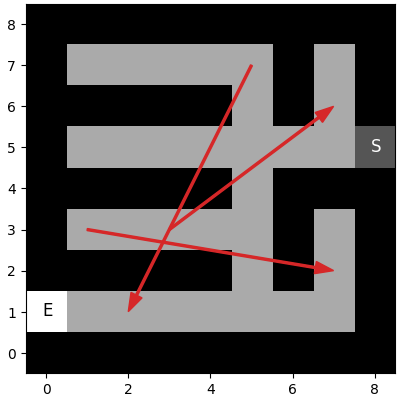

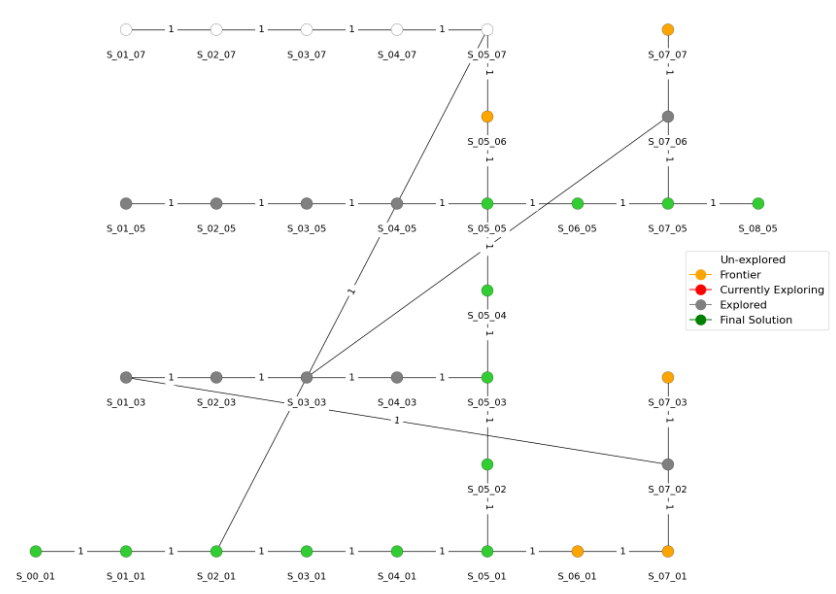

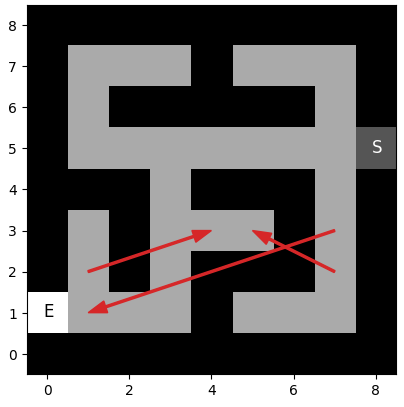

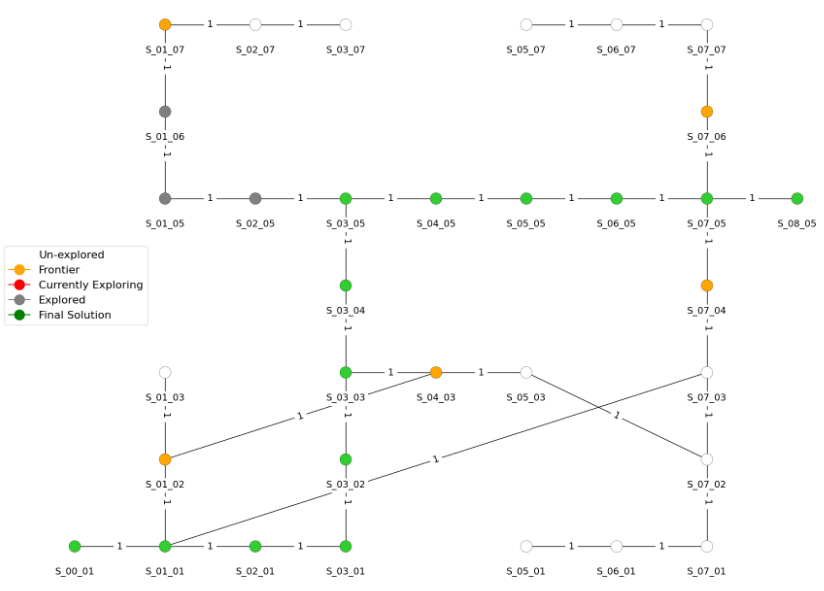

Curiously enough, in this case it was better not to take the wormhole:

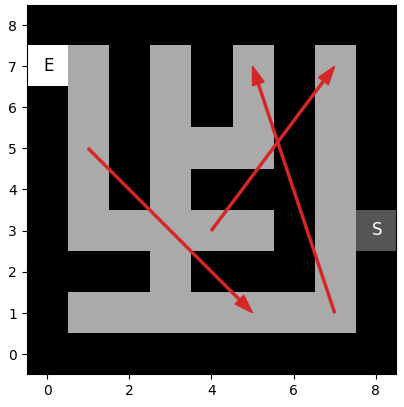

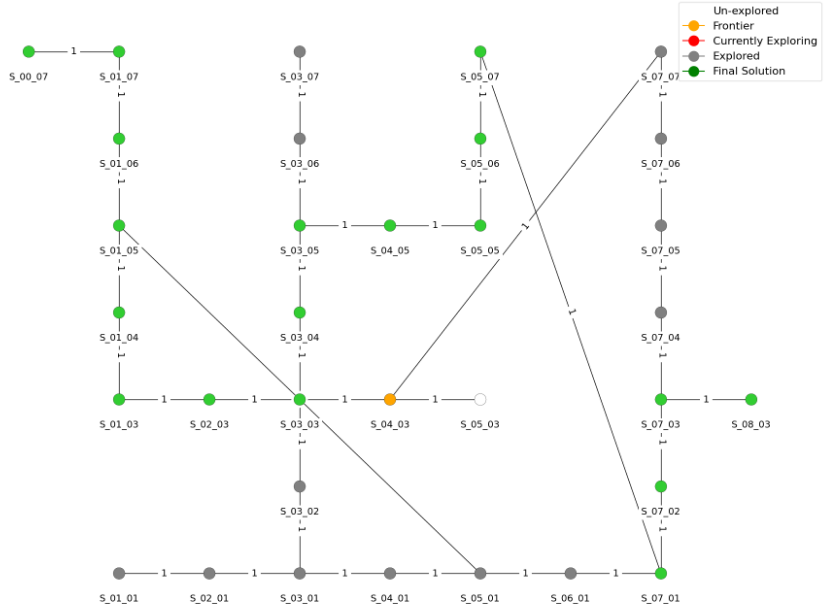